In [18]:
from pathlib import Path
from collections import Counter
import spacy
import pykakasi
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pylab as p
nlp_eng = spacy.load("en_core_web_sm")
nlp_jp = spacy.load("ja_core_news_sm")
kks = pykakasi.kakasi()

In [81]:
#opening the files 
filenames = ['nw_eng1', 'nw_jp', 'eng', 'jp']
def read_files_into_strings(filenames):
    strings = {}
    for filename in filenames:
        with open(f'C:\\Users\\t-czheng\\Documents\\Bookshelf\\books\\{filename}.txt', encoding="UTF8") as f:
            strings[filename] = f.read()
    return strings

In [82]:
#tokenizing the files
import nltk
bookshelf = read_files_into_strings(filenames)

In [123]:
#cleaning the corpuses 
import io
jp_corpus_df = pd.read_csv(io.StringIO(bookshelf['jp']), sep=' ', header=None, names=['num', 'freq', 'word'])
jp_corpus_df= jp_corpus_df.drop(columns=['num'])
eng_corpus_df = pd.read_csv(io.StringIO(bookshelf['eng']), sep='	', header=None, names=[ 'freq', 'word']).head(15000)

In [126]:
jp_corpus_token = nlp_jp(jp_corpus_df['word'].astype(str).sum())

In [125]:
eng_corpus_token = nlp_eng(eng_corpus_df['word'].astype(str).apply(lambda w: w+ ' ').sum())

In [16]:
nw_eng1_token = nlp_eng(bookshelf['nw_eng1'])
nw_jp_token = nlp_jp(bookshelf['nw_jp'])

In [11]:
for token in nw_eng1_token[0:5]:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
            token.shape_, token.is_alpha, token.is_stop)
for token in nw_jp_token[0:5]:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
            token.shape_, token.is_alpha, token.is_stop)

I -PRON- PRON PRP nsubj X True True
was be AUX VBD ROOT xxx True True
37 37 NUM CD attr dd False False
then then ADV RB advmod xxxx True True
, , PUNCT , punct , False False

     
     SPACE _SP  
     False False
一 一 NUM 名詞-数詞 nummod x True True


     

     SPACE _SP  

     False False
僕 僕 PRON 代名詞 nsubj x True False
は は ADP 助詞-係助詞 case x True True


In [12]:
def toromaji(tokens):
    converted = kks.convert(tokens)
    return(list(map(lambda t: t['hepburn'], converted)))
nw_romaji = toromaji(bookshelf['nw_jp'][0:20])
nw_romaji = toromaji(bookshelf['nw_jp'])

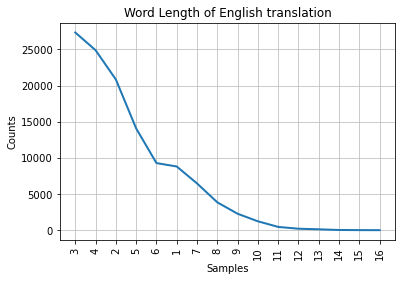

In [14]:
def getfrequency_eng(tokens, title_):
    token_len = list(map(lambda t: len(t.text), filter( lambda t: t.is_alpha, tokens)))
    nltk.FreqDist(token_len).plot(20, title=title_)
getfrequency_eng(nw_eng1_token, "Word Length of English translation")

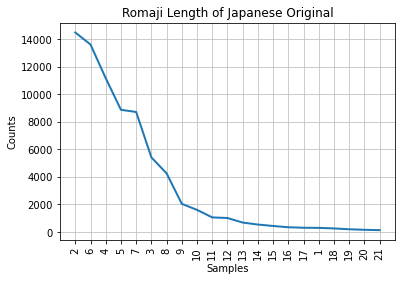

In [15]:
def getfrequency_jp(tokens, title_):
    token_len = list(map(lambda t: len(t), filter( lambda t: t.isalpha(), tokens)))
    nltk.FreqDist(token_len).plot(21, title=title_)
getfrequency_jp(nw_romaji, "Romaji Length of Japanese Original")

In [66]:
def makeDF(tokens):
    arr = []
    for token in tokens: 
        arr.append([token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
            token.shape_, token.is_alpha, token.is_stop])
    return pd.DataFrame(np.array(arr), columns = ['Text', 'Lemma', 'POS', 'Tag', 'Dependency', 'Shape', 'IsAlpha', 'IsStop'])

In [67]:
nw_eng1_df = makeDF(nw_eng1_token)
nw_jp_df.head()

,Text,Lemma,POS,Tag,Dependency,Shape,IsAlpha,IsStop
0,I,-PRON-,PRON,PRP,nsubj,X,True,True
1,was,be,AUX,VBD,ROOT,xxx,True,True
2,37,37,NUM,CD,attr,dd,False,False
3,then,then,ADV,RB,advmod,xxxx,True,True
4,",",",",PUNCT,",",punct,",",False,False


In [68]:
nw_jp_df = makeDF(nw_jp_token)
nw_jp_df.head()


,Text,Lemma,POS,Tag,Dependency,Shape,IsAlpha,IsStop
0,\n,\n,SPACE,_SP,,\n,False,False
1,一,一,NUM,名詞-数詞,nummod,x,True,True
2,\n\n,\n\n,SPACE,_SP,,\n\n,False,False
3,僕,僕,PRON,代名詞,nsubj,x,True,False
4,は,は,ADP,助詞-係助詞,case,x,True,True


In [131]:
eng_corpus_df = makeDF(eng_corpus_token).join(eng_corpus_df)
jp_corpus_df = makeDF(jp_corpus_token).join(jp_corpus_df)

In [71]:
from translate import Translator
toeng_translator= Translator(to_lang="en")
tojp_translator= Translator(to_lang="ja")
nw_jp_df['Translated'] = nw_jp_df['Text'].apply(lambda t: toeng_translator.translate(t))
nw_eng1_df['Translated'] = nw_eng1_df['Text'].apply(lambda t: tojp_translator.translate(t))

ConnectionError: ('Connection aborted.', TimeoutError(10060, 'A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond', None, 10060, None))

In [100]:
nw_jp_df.head()
nw_jp_df.head()

,Text,Lemma,POS,Tag,Dependency,Shape,IsAlpha,IsStop,Translated
0,\n,\n,SPACE,_SP,,\n,False,False,\n
1,一,一,NUM,名詞-数詞,nummod,x,True,True,一
2,\n\n,\n\n,SPACE,_SP,,\n\n,False,False,\n\n
3,僕,僕,PRON,代名詞,nsubj,x,True,False,僕
4,は,は,ADP,助詞-係助詞,case,x,True,True,は


In [101]:

pos = {'SPACE':'Space', 'PUNCT':"Punctuation", 'VERB':"Verb", 'NOUN':"Noun", 'PRON':"Pronoun", 'DET':"Determiner", 
       'ADP':"adposition", 'ADV':'Adverb', 'AUX':'Auxilary', 'ADJ':'Adjective', 
       'CCONJ':'Coordinating Conjunction', 'PROPN':'Proper Nouns', 'PART':'Particle', 
       'SCONJ':'Subordinating Conujunctions', 'NUM':'Number', 'INTJ':'Interjection', 'X':'Other', 'SYM':'Symbol'}

def get_pos_frequency(tokens, title_):
    token_pos = tokens.count_by(spacy.attrs.POS)
    token_pos = sorted(token_pos.items(), key=lambda x: x[1], reverse=True)
    centers = range(len(token_pos))
    fig, ax = plt.subplots()
    chart = plt.bar(centers, [t[1] for t in token_pos], align='edge', width=0.8, tick_label=[pos[tokens.vocab.strings[t[0]]] for t in token_pos])
    for tick in ax.get_xticklabels():
        tick.set_rotation(80)
    plt.title(title_)
    plt.show()
    print([tokens.vocab.strings[t[0]]for t in token_pos])

In [160]:
from translate import Translator
toeng_translator= Translator(to_lang="en")
tojp_translator= Translator(to_lang="ja")
from googletrans import Translator
translator = Translator()

def get_fave_words(tokens, title_, jp):
    token_faves = [t.text for t in filter(lambda t: not t.is_stop and not t.is_punct and not t.is_space, tokens)]
    token_faves = Counter(token_faves)
    token_faves = sorted(token_faves.items(), key=lambda x: x[1], reverse=True)[0:20]
    centers = range(len(token_faves))
    fig, ax = plt.subplots()
    #ax.set_xlabel(xlabel=[t[0] for t in token_faves], fontname = 'SimSun',fontsize = 20)
    chart = plt.bar(centers, [t[1] for t in token_faves], align='edge', width=0.5)
    x = np.arange(len([t[0] for t in token_faves]))
    ax.set_xticks(x)
    if jp:
        ax.set_xticklabels([t[0] + " (" + translator.translate(t[0]).text+ ")" for t in token_faves], fontname = 'SimSun')
    else:
        ax.set_xticklabels([t[0] for t in token_faves], fontname = 'SimSun')
    for tick in ax.get_xticklabels():
        tick.set_rotation(70)
    plt.title(title_)
    plt.show()

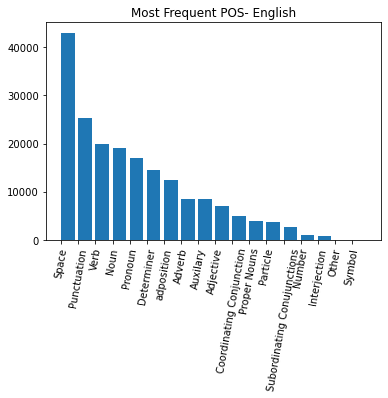

['SPACE', 'PUNCT', 'VERB', 'NOUN', 'PRON', 'DET', 'ADP', 'ADV', 'AUX', 'ADJ', 'CCONJ', 'PROPN', 'PART', 'SCONJ', 'NUM', 'INTJ', 'X', 'SYM']


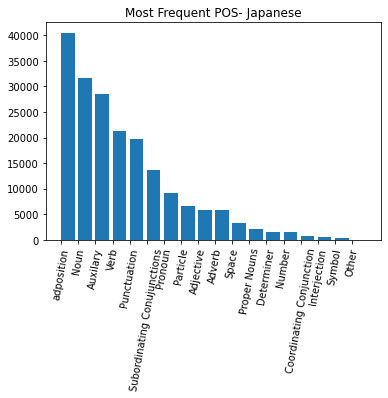

['ADP', 'NOUN', 'AUX', 'VERB', 'PUNCT', 'SCONJ', 'PRON', 'PART', 'ADJ', 'ADV', 'SPACE', 'PROPN', 'DET', 'NUM', 'CCONJ', 'INTJ', 'SYM', 'X']


In [133]:
get_pos_frequency(nw_eng1_token, "Most Frequent POS- English")
get_pos_frequency(nw_jp_token, "Most Frequent POS- Japanese")

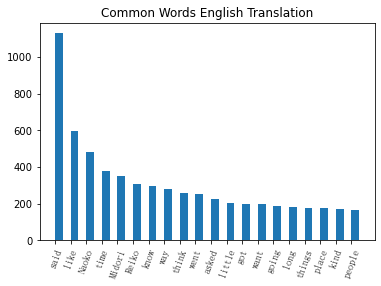

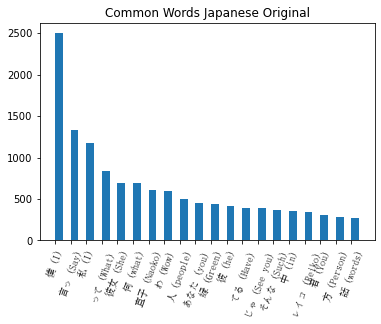

In [161]:
get_fave_words(nw_eng1_token, "Common Words English Translation", False)
get_fave_words(nw_jp_token, "Common Words Japanese Original", True)

In [112]:
#Lexical richness (unique total words in the book)
print("Japanese: ",len(nw_jp_df['Lemma'].unique()))
print("English translation: " , len(nw_eng1_df['Lemma'].unique()))


Japanese:  7553
English translation:  5944


In [113]:
#words per sentence 
def avgWordCount(tokens):
    sentences = list(tokens.sents)
    word_total=0
    sent_total = len(sentences)
    for sentence in sentences:
        word_total+= len(sentence)
    return word_total/sent_total
print("Japanese Original: ", avgWordCount(nw_jp_token))
print("English Translation: ", avgWordCount(nw_eng1_token))

Japanese Original:  20.46456274572309
English Translation:  12.407679896740884


In [ ]:
#dialogue proportion 


In [ ]:
#descriptive properties- adjectives vs adverbs 


In [ ]:
#characteristic verbs and adverbs? in comparison to commonly used 
